In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PySparkShell") \
    .getOrCreate()

In [3]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import lit

In [4]:
import pandas as pd

In [5]:
import plotly.graph_objects as go

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
CoronaBeerMax = spark.read.csv('Corona.csv',inferSchema=True, header=True)
CoronaBeerMax.createOrReplaceTempView("CoronaBeerMax")

CoronaBeerMax=spark\
.sql(\
     "SELECT Max(CoronaBeerMax.Close) as MaxShareVal\
     FROM CoronaBeerMax")

In [9]:
CoronaBeerMin = spark.read.csv('Corona.csv',inferSchema=True, header=True)
CoronaBeerMin.createOrReplaceTempView("CoronaBeerMin")

CoronaBeerMin=spark\
.sql(\
     "SELECT Min(Close) as MinShareVal \
     FROM CoronaBeerMin")

In [10]:
CoronaBeerMax.createOrReplaceTempView("CoronaBeerMax")
CoronaBeerMin.createOrReplaceTempView("CoronaBeerMin")

CoronaBeer=spark\
.sql(\
     "SELECT * \
     FROM CoronaBeerMax,CoronaBeerMin")
CoronaBeer = CoronaBeer.withColumn("BeerName", lit("Corona"))


In [11]:
CarlsbergBeerMax = spark.read.csv('Carlsberg.csv',inferSchema=True, header=True)
CarlsbergBeerMax.createOrReplaceTempView("CarlsbergBeerMax")

CarlsbergBeerMax=spark\
.sql(\
     "SELECT Max(CarlsbergBeerMax.Close) as MaxShareVal\
     FROM CarlsbergBeerMax")

In [12]:
CarlsbergBeerMin = spark.read.csv('Carlsberg.csv',inferSchema=True, header=True)
CarlsbergBeerMin.createOrReplaceTempView("CarlsbergBeerMin")

CarlsbergBeerMin=spark\
.sql(\
     "SELECT Min(CarlsbergBeerMin.Close) as MinShareVal\
     FROM CarlsbergBeerMin")

In [13]:
CarlsbergBeerMax.createOrReplaceTempView("CarlsbergBeerMax")
CarlsbergBeerMin.createOrReplaceTempView("CarlsbergBeerMin")

CarlsbergBeer=spark\
.sql(\
     "SELECT * \
     FROM CarlsbergBeerMax,CarlsbergBeerMin")
CarlsbergBeer = CarlsbergBeer.withColumn("BeerName", lit("Carlsberg"))

In [14]:
HeinekenBeerMax = spark.read.csv('Heineken.csv',inferSchema=True, header=True)
HeinekenBeerMax.createOrReplaceTempView("HeinekenBeerMax")

HeinekenBeerMax=spark\
.sql(\
     "SELECT Max(HeinekenBeerMax.Close) as MaxShareVal\
     FROM HeinekenBeerMax")

In [15]:
HeinekenBeerMin = spark.read.csv('Heineken.csv',inferSchema=True, header=True)
HeinekenBeerMin.createOrReplaceTempView("HeinekenBeerMin")

HeinekenBeerMin=spark\
.sql(\
     "SELECT Min(HeinekenBeerMin.Close) as MinShareVal\
     FROM HeinekenBeerMin")

In [16]:
HeinekenBeerMax.createOrReplaceTempView("HeinekenBeerMax")
HeinekenBeerMin.createOrReplaceTempView("HeinekenBeerMin")

HeinekenBeer=spark\
.sql(\
     "SELECT * \
     FROM HeinekenBeerMax,HeinekenBeerMin")
HeinekengBeer = HeinekenBeer.withColumn("BeerName", lit("Heineken"))

In [17]:
GuinnessBeerMax = spark.read.csv('Guinness.csv',inferSchema=True, header=True)
GuinnessBeerMax.createOrReplaceTempView("GuinnessBeerMax")
GuinnessBeerMax=spark\
.sql(\
     "SELECT Max(Close) as MaxShareVal \
     FROM GuinnessBeerMax")

In [18]:
GuinnessBeerMin = spark.read.csv('Guinness.csv',inferSchema=True, header=True)
GuinnessBeerMin.createOrReplaceTempView("GuinnessBeerMin")
GuinnessBeerMin=spark\
.sql(\
     "SELECT Min(Close) as MinShareVal \
     FROM GuinnessBeerMin")

In [19]:
GuinnessBeerMax.createOrReplaceTempView("GuinnessBeerMax")
GuinnessBeerMin.createOrReplaceTempView("GuinnessBeerMin")

GuinnessBeer=spark\
.sql(\
     "SELECT * \
     FROM GuinnessBeerMax,GuinnessBeerMin")
GuinnessBeer = GuinnessBeer.withColumn("BeerName", lit("Guinness"))

In [20]:
Beer=CarlsbergBeer.union(GuinnessBeer)
Beer=Beer.union(CoronaBeer)
Beer=Beer.union(HeinekengBeer)
Beer=Beer.withColumn("Rate", lit(1- (Beer.MinShareVal / Beer.MaxShareVal)))
Beer.show()


+-----------+-----------+---------+-------------------+
|MaxShareVal|MinShareVal| BeerName|               Rate|
+-----------+-----------+---------+-------------------+
|     1057.0| 663.599976|Carlsberg|0.37218545316934726|
| 170.699997| 102.589996| Guinness|0.39900411363217536|
| 208.339996| 105.639999|   Corona| 0.4929442208494619|
| 104.949997|  70.779999| Heineken|  0.325583601493576|
+-----------+-----------+---------+-------------------+



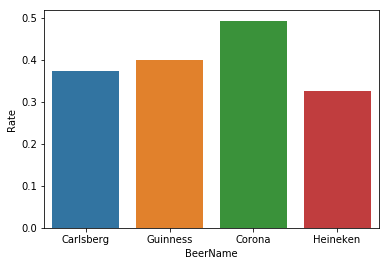

In [21]:
sns.barplot(x="BeerName",y="Rate",data=Beer.toPandas())